# Notes on Machine Learning Models - Part 2 - Model Engineering

အပိုင်း ၃ ပိုင်းရှိတဲ့ ဒီ notes တွေမှာ အဓိကအားဖြင့် Machine Learning Model တွေကို အသုံးပြုရာမှာ သတိပြုရမဲ့ အောက်ပါ အကြောင်းအရာများကို ပြောပြပေးသွားမှာ ဖြစ်ပါတယ်။ 

* Feature Engineering 
* Model Engineering and
* Coding Best Practices

ဒီအပိုင်းက ဒုတိယအပိုင်း Model Engineering ဖြစ်ပါတယ်။ 

Model Engineering အပိုင်းမှာ ပထမဆုံး ဆုံးဖြတ်ရမှာကတော့ လက်ရှိ problem ဟာ ဘယ်အမျိုးအစားလဲ ဆိုတာပဲ ဖြစ်ပါတယ်။

Machine Learning problem တွေကို အောက်ပါအတိုင်း အမျိုးအစား ခွဲခြားနိုင်ပါတယ်။ 

* Supervised Learning 
  * Regression
  * Classification
* Unsupervised Learning
  * Clustering
  * Dimensionality Reduction
* Semi-supervised Learning
  * Reinforcement Learning

**Supervised Learning**

Supervised Learning မှာ 

* Given $X$ and $y$ တွေကနေပြီး သူတို့ရဲ့ ဆက်သွယ်ချက် function $f(X)=\hat{y}$ ကို ရှာတာကို training
* Unseen $X_{\mathrm{unseen}}$ တွေနဲ့ $f(X)$ ကနေပြီး ဖြစ်နိုင်တဲ့ $\hat{y}_{\mathrm{unseen}}$ ကို တွက်တဲ့ inference ဆိုပြီး ရှိပါတယ်။ 

Training လုပ်ရာမှာ unseen ကို simulate လုပ်တဲ့အနေနဲ့ dataset (both $X$ and $y$) ကို train/test split လုပ်လေ့ရှိပါတယ်။ 

> **အရေးကြီး မှတ်ရန်မှာ train လုပ်နေစဉ်အတွင်း ဘယ်တော့မှ test split နဲ့ `fit` မလုပ်ရန် ဖြစ်သည်**

ဒီနေရာမှာ $y$ ရဲ့ data type ပေါ်မူတည်ပြီး 

* real numeric value (float) ဖြစ်ခဲ့ရင် regression
* categorical value (int/str) ဖြစ်ခဲ့ရင် classification လို့ ခွဲတာ ဖြစ်ပါတယ်။

ဒီအပိုင်းမှာ 

* Model Validation Technique တွေနဲ့
* Bias and Variance ကို Quantify လုပ်တာ တို့ကို ပြောမှာ ဖြစ်ပါတယ်။ 

**Unsupervised Learning**

Unsupervised Learning မှာ 

* ပေးထားတဲ့ data ကို တူရာတူရာ စုတာကို clustering နဲ့ 
* dimension (column) တွေ များနေတာကို (information မလျော့စေပဲ) နည်းအောင်လုပ်တာကို dimensionality reduction လို့ ၂ မျိုး ခွဲခြားနိုင်ပါတယ်။

ဒီနေ့ခေတ် ပြဿနာအများစုက supervised learning ဖြစ်ပြီး unsupervised learning တွေကို supervised learning solution တွေရဲ့ feature engineering အဖြစ် သုံးတတ်ကြပါတယ်။ 

> sklearn က clustering/dimensionality-reduction package တွေကို အသုံးပြုနည်းကို Part 1 - Feature Engineering မှာ အသေးစိတ် ပြောထားပြီးပြီမို့လို့ ဒီအပိုင်းမှာ ပြန်မပြောတော့ပါ။ 

ဒီအပိုင်းမှာ 

* cosine distance ကို Euclidean distance ပဲ အသုံးပြုလို့ရတဲ့ clustering algorithm တွေမှာ ဘယ်လို သုံးရလဲဆိုတာ

ကို ဥပမာ ပြပြီး ပြောမှာ ဖြစ်ပါတယ်။

**Semi-supervised Learning**

Semi-supervised Learning မှာတော့ ရည်မှန်းချက် ပန်းတိုင် (ကားမောင်းတာ၊ ဂိမ်းဆော့တာ စသည်) တခုကို ပေးထားပြီး အဲဒီ ပန်းတိုင်ကို ရောက်အောင် လုပ်ရမဲ့ strategy ကို learn လုပ်တာတွေဖြစ်တဲ့ reinforcement learning ပါပါတယ်။ 

> advance topic ဖြစ်တဲ့အတွက်ရယ်၊ လက်တွေ့ လုပ်ငန်းခွင် application အများအပြား မရှိသေးတဲ့အတွက်ရယ် ဒီအပိုင်းမှာ မပြောတော့ပါဘူး။ 

In [ ]:
import warnings
warnings.filterwarnings('ignore')

## Model Validation

### Feature Preparations

Model Validation မစခင်မှာ ကြိုတင် ပြင်ဆင်တဲ့ အနေနဲ့ Part 1 က Feature တွေကို အရင် တွက်ကြမယ်။ 

In [ ]:
from sklearn import preprocessing as sk_pp
from sklearn import datasets as sk_ds
from sklearn import model_selection as sk_ms
from sklearn import feature_selection as sk_fs

import numpy as np
import pandas as pd

In [ ]:
df_X, ds_y = sk_ds.fetch_openml(name="credit-g", as_frame=True, return_X_y=True)
df_X.head()

In [ ]:
df_X_tr, df_X_ts, ds_y_tr, ds_y_ts = sk_ms.train_test_split(df_X, ds_y, test_size=0.2, random_state=42)

In [ ]:
df_X_tr_num = df_X_tr.select_dtypes(include=["number"])
numeric_columns = df_X_tr_num.columns

categorical_columns = df_X_tr.select_dtypes(include=["category"]).columns
ordinal_columns = ["credit_history", "savings_status"]
norminal_columns = [c for c in categorical_columns if c not in ordinal_columns]

oe = sk_pp.OrdinalEncoder(
    # အောက်က categories parameter မှာ array-like of array-like (list of list) ထည့်ပေးရတာ သတိပြုပါ။
    categories=[
        ['no credits/all paid', 'all paid', 'existing paid', 'delayed previously', 'critical/other existing credit'],
        ['no known savings', '<100', '100<=X<500', '500<=X<1000', '>=1000']
    ], 
    # handle_unknown က သိပ်အရေးကြီးတယ်။ ဒါမပါသွားရင် production ကျမှ ပြဿနာ တက်တတ်တယ်။ default is "error"
    handle_unknown="use_encoded_value", 
    unknown_value=np.nan
)
oe.fit(df_X_tr[ordinal_columns])
ordinal_features = ["oe_{}".format(c) for c in ordinal_columns]

df_X_tr_num.loc[:, ordinal_columns] = oe.transform(df_X_tr[ordinal_columns])

ohe = sk_pp.OneHotEncoder(sparse=False, handle_unknown="ignore")
ohe.fit(df_X_tr[norminal_columns])

ss = sk_pp.StandardScaler()
mms = sk_pp.MinMaxScaler()
mas = sk_pp.MaxAbsScaler()

numerical_columns = df_X_tr_num.columns

norminal_features = ohe.get_feature_names_out()
df_feat_tr = pd.DataFrame(data=None, index=df_X_tr.index)
df_feat_tr.loc[:, norminal_features] = ohe.transform(df_X_tr[norminal_columns])

ss_features = ["ss_{}".format(c) for c in numerical_columns]
mms_features = ["mms_{}".format(c) for c in numerical_columns]
mas_features = ["mas_{}".format(c) for c in numerical_columns]

df_feat_tr.loc[:, ss_features] = ss.fit_transform(df_X_tr_num)
df_feat_tr.loc[:, mms_features] = mms.fit_transform(df_X_tr_num)
df_feat_tr.loc[:, mas_features] = mas.fit_transform(df_X_tr_num)

df_feat_tr.head()

အပေါ်က cell မှာ ပါတာတွေက part 1 မှာ ရှင်းပြီးသားမို့ အသေးစိတ် မရှင်းတော့ဘူး။ 

> ရှေ့မှာ သုံးလို့ လွယ်အောင် အပေါ်က cell မှာ လုပ်ထားတာတွေကို function 2 ခု ခွဲရေးလိုက်မယ်။

In [ ]:
def fit_features(X, ordinal_columns=["credit_history", "savings_status"]):
    X_num = X.select_dtypes(include=["number"])

    categorical_columns = X.select_dtypes(include=["category"]).columns
    norminal_columns = [c for c in categorical_columns if c not in ordinal_columns]

    oe = sk_pp.OrdinalEncoder(
        categories=[
            ['no credits/all paid', 'all paid', 'existing paid', 'delayed previously', 'critical/other existing credit'],
            ['no known savings', '<100', '100<=X<500', '500<=X<1000', '>=1000']
        ], 
        handle_unknown="use_encoded_value", 
        unknown_value=np.nan
    )
    oe.fit(X[ordinal_columns])
    
    X_num.loc[:, ordinal_columns] = oe.transform(X[ordinal_columns])

    ohe = sk_pp.OneHotEncoder(sparse=False, handle_unknown="ignore")
    ohe.fit(X[norminal_columns])
    
    ss, mms, mas = sk_pp.StandardScaler(), sk_pp.MinMaxScaler(), sk_pp.MaxAbsScaler()

    ss.fit(X_num), mms.fit(X_num), mas.fit(X_num)

    return oe, ohe, ss, mms, mas

def transform_features(X, oe, ohe, ss, mms, mas):
    X_num = X.select_dtypes(include=["number"])
    X_num.loc[:, ordinal_columns] = oe.transform(X[ordinal_columns])

    categorical_columns = X.select_dtypes(include=["category"]).columns
    norminal_columns = [c for c in categorical_columns if c not in ordinal_columns]

    df_feat_tr = pd.DataFrame(data=None, index=X.index)
    
    norminal_features = ohe.get_feature_names_out()
    df_feat_tr.loc[:, norminal_features] = ohe.transform(X[norminal_columns])

    numerical_columns = X_num.columns

    ss_features = ["ss_{}".format(c) for c in numerical_columns]
    mms_features = ["mms_{}".format(c) for c in numerical_columns]
    mas_features = ["mas_{}".format(c) for c in numerical_columns]

    df_feat_tr.loc[:, ss_features] = ss.transform(X_num)
    df_feat_tr.loc[:, mms_features] = mms.transform(X_num)
    df_feat_tr.loc[:, mas_features] = mas.transform(X_num)

    return df_feat_tr

oe, ohe, ss, mms, mas = fit_features(df_X_tr)
df_feat_tr = transform_features(df_X_tr, oe, ohe, ss, mms, mas)
df_feat_tr.head()

PCA နဲ့ SVD Features တွေကိုတော့ ထည့်မပြတော့ဘူး။

In [ ]:
le = sk_pp.LabelEncoder()
y_tr = le.fit_transform(ds_y_tr)
le.classes_

In [ ]:
y_ts = le.transform(ds_y_ts)

In [ ]:
y_tr = 1 - y_tr
y_ts = 1 - y_ts

### Model Performance


Model တခုရဲ့ Performance ကို တိုင်းတာတဲ့ နည်းတွေ အများကြီးရှိတယ်။ အဲဒီအထဲက အောက်ပါတို့ကို အသုံးများတယ်။ 

* Regression:
  * Means Absolute Error (MAE)
  * Means Absolute Percentage Error (MAPE)
  * Means Squared Error (MSE)

* Classification:
  * Precision - TP/(TP+FP)
  * Recall or Sensitivity - TP/(TP+FN)
  * Specificity - TN/(TN+FN) 
  * F1 score - geometric means (or harmonic means) of Precision and Recall
  * AUC ROC

အခု problem က classification problem ဖြစ်တဲ့အတွက် Precision, Recall, AUC ROC တို့ကို တွက်မယ်။

In [ ]:
from sklearn import metrics as sk_metrics
from sklearn import linear_model as sk_lm
from sklearn import svm as sk_svm
from sklearn import ensemble as sk_ensemble
from sklearn import neural_network as sk_nn
from sklearn import neighbors as sk_neighbors

In [99]:
from matplotlib import pyplot as plt
import traceback
class_weight={0: 1, 1: 5}

def fit_model(X, y, model):
    model.fit(X, y)
    return model

def test_model(X, y, model, model_desc):
    sample_weight = [class_weight[_y] for _y in y]
    y_hat = model.predict(X)
    try:
        y_hat_probs = model.predict_proba(X)
        if model_desc: print (model_desc) 
        print (sk_metrics.classification_report(y, y_hat, sample_weight=sample_weight))
        print ("roc auc : {}".format(sk_metrics.roc_auc_score(y, y_hat_probs[:, 1], sample_weight=sample_weight)))
        fpr, tpr, thr = sk_metrics.roc_curve(y, y_hat_probs[:, 1], sample_weight=sample_weight)
        plt.plot(fpr, tpr)
        plt.show()
    except Exception as e:
        traceback.print_tb(e.__traceback__)

    return y_hat

In [ ]:
lm = sk_lm.SGDClassifier(penalty="elasticnet", loss="log", max_iter=2000, n_jobs=2, random_state=42)
svc = sk_svm.NuSVC(kernel="rbf", class_weight=class_weight, random_state=42, probability=True)
gbc = sk_ensemble.GradientBoostingClassifier(n_estimators=100, max_depth=64, max_leaf_nodes=1024, random_state=42)
neighbors = sk_neighbors.KNeighborsClassifier(n_neighbors=5, n_jobs=2)
nn = sk_nn.MLPClassifier(hidden_layer_sizes=(10, 10), activation="relu", solver="adam", max_iter=2000, random_state=42)

fit_model(df_feat_tr, y_tr, lm)
fit_model(df_feat_tr, y_tr, svc)
fit_model(df_feat_tr, y_tr, gbc)
fit_model(df_feat_tr, y_tr, neighbors)
fit_model(df_feat_tr, y_tr, nn)

df_feat_ts = transform_features(df_X_ts, oe, ohe, ss, mms, mas)

for model, model_desc in zip([lm, svc, gbc, neighbors, nn], ["linear", "svm", "boost", "neighbors", "neural net"]):
    test_model(df_feat_ts, y_ts, model=model, model_desc=model_desc)

### Validation and Model Confidence

Model Performance ကို တိုင်းတာတော့ ဟုတ်ပါပြီ။ ကံကောင်းပြီး (ကြက်ကန်းတိုးပြီး) ဒီ performance ကို ရလာတာ မဟုတ်ဘူးလို့ ဘယ်လို သက်သေပြမလဲ။

#### K-Fold Cross Validation

svc
              precision    recall  f1-score   support

           0       0.46      0.89      0.60      71.0
           1       0.90      0.48      0.63     145.0

    accuracy                           0.62     216.0
   macro avg       0.68      0.69      0.62     216.0
weighted avg       0.75      0.62      0.62     216.0

roc auc : 0.8377853326857697


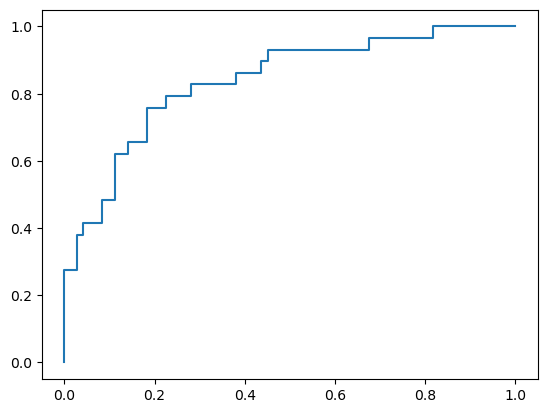

svc
              precision    recall  f1-score   support

           0       0.45      0.99      0.62      70.0
           1       0.98      0.43      0.60     150.0

    accuracy                           0.61     220.0
   macro avg       0.72      0.71      0.61     220.0
weighted avg       0.81      0.61      0.61     220.0

roc auc : 0.7885714285714286


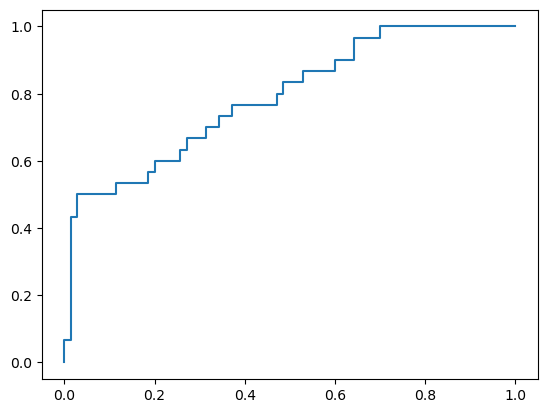

svc
              precision    recall  f1-score   support

           0       0.39      0.91      0.55      68.0
           1       0.92      0.41      0.56     160.0

    accuracy                           0.56     228.0
   macro avg       0.66      0.66      0.56     228.0
weighted avg       0.76      0.56      0.56     228.0

roc auc : 0.7899816176470589


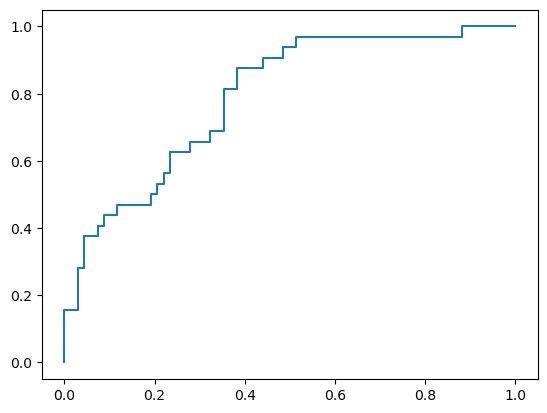

svc
              precision    recall  f1-score   support

           0       0.51      0.86      0.64      73.0
           1       0.88      0.56      0.68     135.0

    accuracy                           0.66     208.0
   macro avg       0.70      0.71      0.66     208.0
weighted avg       0.75      0.66      0.67     208.0

roc auc : 0.7579908675799087


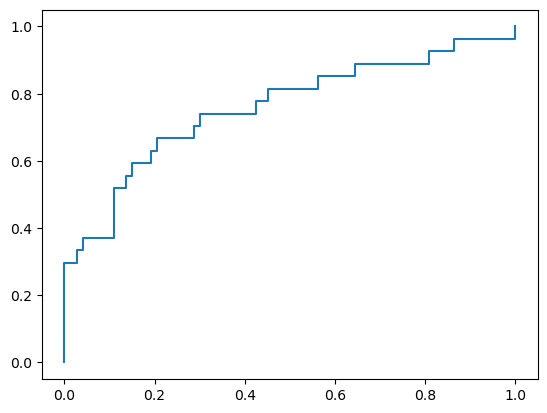

svc
              precision    recall  f1-score   support

           0       0.42      0.87      0.57      71.0
           1       0.87      0.41      0.56     145.0

    accuracy                           0.56     216.0
   macro avg       0.65      0.64      0.56     216.0
weighted avg       0.72      0.56      0.56     216.0

roc auc : 0.7518212724623603


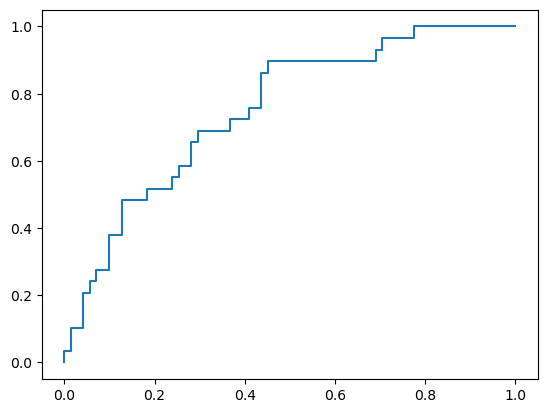

svc
              precision    recall  f1-score   support

           0       0.33      0.92      0.49      62.0
           1       0.94      0.39      0.56     190.0

    accuracy                           0.52     252.0
   macro avg       0.63      0.66      0.52     252.0
weighted avg       0.79      0.52      0.54     252.0

roc auc : 0.7750424448217318


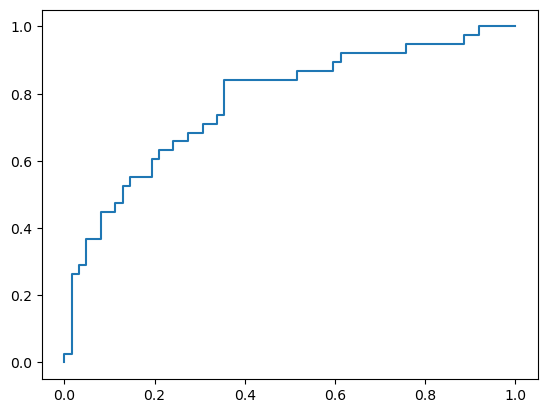

svc
              precision    recall  f1-score   support

           0       0.51      0.87      0.64      77.0
           1       0.83      0.43      0.57     115.0

    accuracy                           0.61     192.0
   macro avg       0.67      0.65      0.61     192.0
weighted avg       0.70      0.61      0.60     192.0

roc auc : 0.7278373800112931


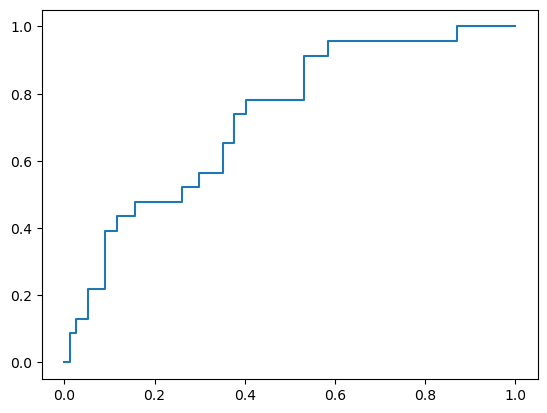

svc
              precision    recall  f1-score   support

           0       0.44      0.91      0.59      68.0
           1       0.93      0.50      0.65     160.0

    accuracy                           0.62     228.0
   macro avg       0.68      0.71      0.62     228.0
weighted avg       0.78      0.62      0.63     228.0

roc auc : 0.8506433823529413


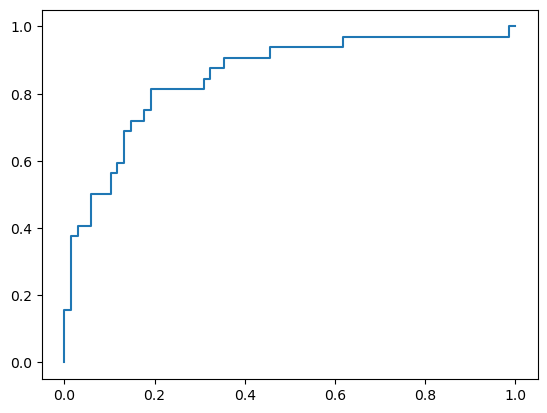

svc
              precision    recall  f1-score   support

           0       0.57      0.87      0.68      75.0
           1       0.88      0.60      0.71     125.0

    accuracy                           0.70     200.0
   macro avg       0.72      0.73      0.70     200.0
weighted avg       0.76      0.70      0.70     200.0

roc auc : 0.8626666666666667


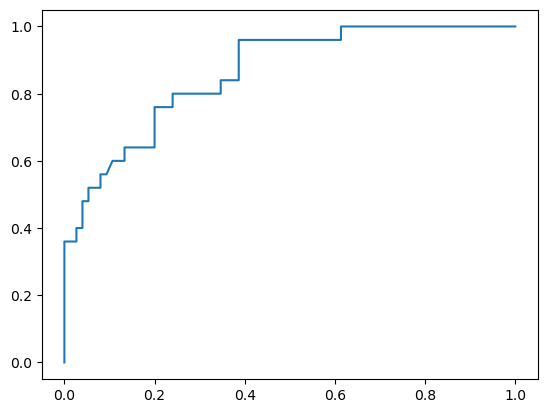

svc
              precision    recall  f1-score   support

           0       0.39      0.89      0.54      65.0
           1       0.92      0.49      0.64     175.0

    accuracy                           0.60     240.0
   macro avg       0.66      0.69      0.59     240.0
weighted avg       0.78      0.60      0.61     240.0

roc auc : 0.7815384615384615


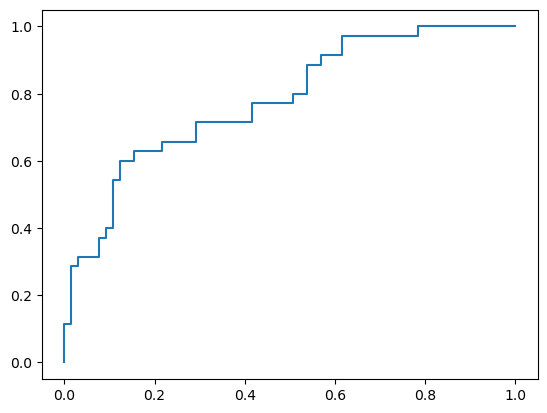

[0.77 0.82 0.75 0.78 0.74 0.72 0.77 0.78 0.8  0.75]


In [100]:
kfold = sk_ms.KFold(n_splits=10, shuffle=True, random_state=42)
accuracies = []

# notice how kfold can be used to get train_idx and test_idx
for train_idx, test_idx in kfold.split(df_X, ds_y):
    X_train, y_train = df_X.iloc[train_idx, :], ds_y.iloc[train_idx]
    X_test, y_test = df_X.iloc[test_idx, :], ds_y.iloc[test_idx]

    # transform the y because we haven't
    _y_train = 1 - le.transform(y_train)
    _y_test = 1 - le.transform(y_test)

    # features
    oe, ohe, ss, mms, mas = fit_features(X_train)
    _X_train = transform_features(X_train, oe, ohe, ss, mms, mas)
    _X_test = transform_features(X_test, oe, ohe, ss, mms, mas)
    
    # model
    svc = sk_svm.NuSVC(kernel="rbf", class_weight=class_weight, random_state=42, probability=True)
    fit_model(_X_train, _y_train, svc)
    
    y_hat = test_model(_X_test, _y_test, model=svc, model_desc="svc")
    
    accuracies.append((y_hat == _y_test).sum()/float(len(_y_test)))

accuracies = np.array(accuracies)
print(accuracies)

#### Confidence of Model Performance

Statistically speaking, ဘယ် data array ကို မဆို confidence interval တွက်လို့ ရတယ်။

In [101]:
import scipy.stats as st

#create 95% confidence interval for population mean weight
p=0.05
st.t.interval(alpha=1 - p, df=len(accuracies)-1, loc=np.mean(accuracies), scale=st.sem(accuracies)) 

(0.7469945311288869, 0.7890054688711131)

ဒီပုံစံအတိုင်းပဲ precision/recall စတာတွေကိုလဲ confidence interval နဲ့ ဖော်ပြနိုင်တယ်။ 

## Bias and Variance Trade-off

ပထမဆုံး Bias များတဲ့ Model တခုနဲ့ Variance များတဲ့ Model တခုကို ဖန်တီးကြည့်ရအောင်။

In [114]:
# with bad_features, the model we create will be high variance (overfit)
bad_features = [c for c in df_feat_tr.columns if c not in [
    'checking_status_0<=X<200', 'checking_status_<0',
    'checking_status_>=200', 'purpose_new car',
    'personal_status_male div/sep', 'property_magnitude_car',
    'job_skilled', 'ss_existing_credits', 'mms_credit_amount',
    'mms_credit_history'
    ]
]
high_variance = sk_neighbors.KNeighborsClassifier(n_neighbors=5, n_jobs=2)
high_variance.fit(df_feat_tr[bad_features], y_tr)
y_hat_high_variance = high_variance.predict(df_feat_ts[bad_features])
print (sk_metrics.classification_report(y_ts, y_hat_high_variance, sample_weight=[{0:1, 1:5}[_y] for _y in y_ts]))

              precision    recall  f1-score   support

           0       0.38      0.91      0.54     141.0
           1       0.87      0.31      0.45     295.0

    accuracy                           0.50     436.0
   macro avg       0.63      0.61      0.50     436.0
weighted avg       0.72      0.50      0.48     436.0



In [126]:
# with some good features, the model we create will be ok
# but we will tweak the intercept_ (the bias term) to make it bad
good_features = ['checking_status_0<=X<200', 'checking_status_<0',
    'checking_status_>=200', 'purpose_new car',
    'mms_credit_amount','mms_credit_history'
]
high_bias = sk_lm.SGDClassifier(loss="log", penalty="elasticnet", max_iter=500, n_jobs=2)
high_bias.fit(df_feat_tr[good_features], y_tr)
high_bias.intercept_ = high_bias.intercept_ - 0.2
y_hat_high_bias = high_bias.predict(df_feat_ts[good_features])
print (sk_metrics.classification_report(y_ts, y_hat_high_bias, sample_weight=[{0:1, 1:5}[_y] for _y in y_ts]))

              precision    recall  f1-score   support

           0       0.34      1.00      0.51     141.0
           1       1.00      0.07      0.13     295.0

    accuracy                           0.37     436.0
   macro avg       0.67      0.53      0.32     436.0
weighted avg       0.79      0.37      0.25     436.0



**QUESTION** -- How to differentiate them ?

မြင်နေရတဲ့ classification report မှာ accuracy က ထပ်တူထပ်မျှ ညံ့နေတယ်။ ဒီတော့ model က bias များနေသလား၊ variance များနေသလား ဘယ်လို သိနိုင်မလဲ။

**ANSWER** -- Training Dataset ကို Predict လုပ်ခိုင်းကြည့်ပါ။

In [127]:
y_hat_high_variance_tr= high_variance.predict(df_feat_tr[bad_features])
print (sk_metrics.classification_report(y_tr, y_hat_high_variance_tr, sample_weight=[{0:1, 1:5}[_y] for _y in y_tr]))

              precision    recall  f1-score   support

           0       0.48      0.92      0.63     559.0
           1       0.93      0.54      0.69    1205.0

    accuracy                           0.66    1764.0
   macro avg       0.71      0.73      0.66    1764.0
weighted avg       0.79      0.66      0.67    1764.0



In [128]:
y_hat_high_bias_tr = high_bias.predict(df_feat_tr[good_features])
print (sk_metrics.classification_report(y_tr, y_hat_high_bias_tr, sample_weight=[{0:1, 1:5}[_y] for _y in y_tr]))

              precision    recall  f1-score   support

           0       0.33      0.99      0.49     559.0
           1       0.92      0.06      0.11    1205.0

    accuracy                           0.35    1764.0
   macro avg       0.62      0.52      0.30    1764.0
weighted avg       0.73      0.35      0.23    1764.0



Variance များတဲ့ model က 

* test performance ညံ့ပြီး
* training performance ကောင်းနေပါလိမ့်မယ်။

Bias များတဲ့ model က 

* test performance ရော
* training performance ပါ ညံ့နေပါလိမ့်မယ္။

## Converting Data to Have Cosine Distance

Natural Language Processing လို ကိစ္စမျိုးတွေမှာ cosine distance နဲ့မှ အဆင်ပြေတယ်။ 

ပြဿနာက `sklearn.cluster.KMeans` လိုမျိုး class တွေက cosine distance နဲ့ အလုပ်မလုပ်ဘူး။

ဒီတော့ dataset ကို cosine distance နဲ့ တူအောင် ကိုယ့်ဟာကိုယ် လုပ်ယူရမယ်။

In [129]:
from sklearn import cluster as sk_clus

normalizer = sk_pp.Normalizer(norm="l2")
df_feat_tr_norm = normalizer.fit_transform(df_feat_tr)

kmeans = sk_clus.KMeans()
kmeans.fit(df_feat_tr_norm)

KMeans()

### The Proof

Let us start with definitions.

Cosine can be derived from definition of dot-product:

$X \cdot Y = cos(\theta)\|X\|\|Y\|$

$\Rightarrow cos(\theta) = \frac{X \cdot Y}{\|X\|\|Y\|}$ 

> Also take note that dot-product $X \cdot Y$ is a scalar and is the same as $X^T Y$

When normalized, both $\|X\|$ and $\|Y\|$ becomes 1 $\because$ it is the definition of normalization.

$\therefore cos(\theta) = X \cdot Y$ when both $X$ and $Y$ are normalized unit vectors.

> The above $cos(\theta)$ is cosine similarity because $cos(0)=1$ and $cos(\pi/2)=0$.
>
> Cosine distance is given by $1 - cos(\theta)$.

---



Euclidean distance is L2-Norm of $X-Y$. 

$dist(X, Y) = \|X - Y\|$

Let's square it.

$dist(X, Y)^2 = \|X - Y\|^2$

$= (X-Y)^T(X-Y)$

> $ \because V^T V = \sum{v_i^2}$ by definition.

$= (X^T-Y^T)(X-Y)$

$= (X^T X) - (X^T Y) - (Y^T X) + (Y^T Y)$ 

> note that the two terms in middle are scaler and the same, i.e. $(X^T Y) = (Y^T X)$.

$= (1) - (X^T Y) - (X^T Y) + (1)$

$= 2 - 2 (X^T Y)$

$= 2 (1 - X^T Y)$

$= 2 (1 - X \cdot Y)$

$= 2 (1 - cos(\theta))$

$= 2 \times$ cosine distance.